In [25]:
words = [w.lower() for w in open('Indian_Names.txt','r').read().splitlines()]
words[:5]
len(words)
#max(len(w) for w in words)

53982

In [26]:
words[:1]

['aaban']

In [27]:
from collections import defaultdict
bi = defaultdict(int)
for w in words[:3]:
    chs = ['<S>'] + list(w) + ['<E>']
    for c1,c2 in zip(chs,chs[1:]):
        bigram = (c1,c2)
        bi[bigram] += 1
        print(c1,c2)
        

<S> a
a a
a b
b a
a n
n <E>
<S> a
a a
a b
b h
h a
a r
r a
a n
n <E>
<S> a
a a
a b
b h
h a
a s
s <E>


In [28]:
from collections import defaultdict
bi = defaultdict(int)
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for c1,c2 in zip(chs,chs[1:]):
        bigram = (c1,c2)
        bi[bigram] += 1
        
bi

defaultdict(int,
            {('<S>', 'a'): 6476,
             ('a', 'a'): 4483,
             ('a', 'b'): 1431,
             ('b', 'a'): 1747,
             ('a', 'n'): 25646,
             ('n', '<E>'): 13513,
             ('b', 'h'): 1283,
             ('h', 'a'): 18167,
             ('a', 'r'): 10752,
             ('r', 'a'): 10543,
             ('a', 's'): 5382,
             ('s', '<E>'): 458,
             ('a', 't'): 5185,
             ('t', '<E>'): 1088,
             ('h', 'e'): 2381,
             ('e', 'e'): 4232,
             ('e', 'r'): 1126,
             ('r', '<E>'): 1584,
             ('b', 'i'): 916,
             ('i', '<E>'): 8863,
             ('i', 'l'): 2118,
             ('l', 'e'): 620,
             ('e', 's'): 3516,
             ('s', 'h'): 14246,
             ('h', '<E>'): 4551,
             ('i', 'r'): 2754,
             ('i', 's'): 4328,
             ('a', 'y'): 2714,
             ('y', 'a'): 7506,
             ('a', 'c'): 303,
             ('c', 'h'): 1718,
      

In [29]:
sorted(bi.items(), key = lambda k:-k[1])

[(('a', 'n'), 25646),
 (('h', 'a'), 18167),
 (('a', '<E>'), 16312),
 (('t', 'h'), 15185),
 (('s', 'h'), 14246),
 (('n', '<E>'), 13513),
 (('a', 'r'), 10752),
 (('r', 'a'), 10543),
 (('i', '<E>'), 8863),
 (('h', 'i'), 8170),
 (('n', 'a'), 7889),
 (('y', 'a'), 7506),
 (('n', 'i'), 6941),
 (('k', 'a'), 6619),
 (('<S>', 'a'), 6476),
 (('v', 'a'), 6045),
 (('m', 'a'), 5546),
 (('a', 's'), 5382),
 (('a', 't'), 5185),
 (('i', 'n'), 5154),
 (('<S>', 's'), 5140),
 (('r', 'i'), 4935),
 (('i', 't'), 4881),
 (('h', '<E>'), 4551),
 (('l', 'a'), 4496),
 (('a', 'a'), 4483),
 (('v', 'i'), 4469),
 (('i', 's'), 4328),
 (('<S>', 'k'), 4233),
 (('e', 'e'), 4232),
 (('s', 'a'), 4203),
 (('<S>', 'v'), 4106),
 (('<S>', 'm'), 3849),
 (('a', 'm'), 3845),
 (('a', 'l'), 3842),
 (('a', 'v'), 3635),
 (('<S>', 'n'), 3551),
 (('e', 's'), 3516),
 (('<S>', 'r'), 3353),
 (('j', 'a'), 3343),
 (('i', 'k'), 3324),
 (('<S>', 'p'), 3289),
 (('d', 'h'), 3034),
 (('n', 't'), 3025),
 (('e', 'n'), 3011),
 (('<S>', 'd'), 2965),


In [30]:
chars =  sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

In [31]:
#!pip install torch
import torch
a = torch.zeros((28,28),dtype = torch.int32)

In [32]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for c1,c2 in zip(chs,chs[1:]):
        ix1 = stoi[c1]
        ix2 = stoi[c2]
        a[ix1,ix2] +=1
a

KeyboardInterrupt: 

In [ ]:
itos = {i:s for s,i in stoi.items()}

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

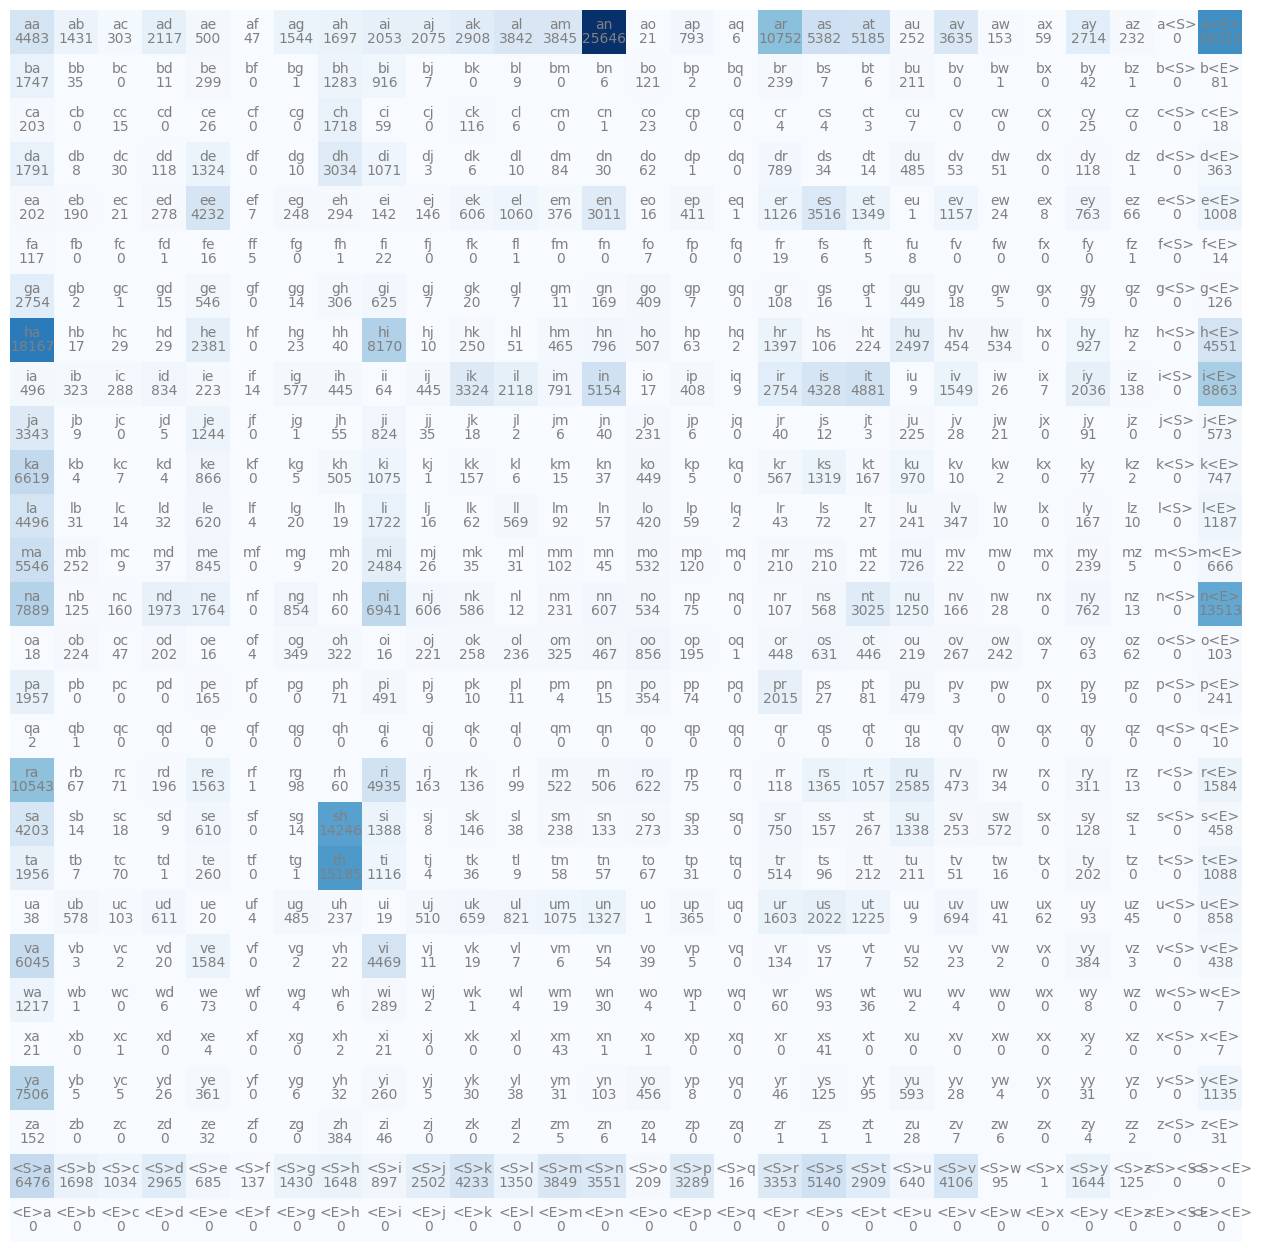

In [ ]:
#!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize =(16,16))
plt.imshow(a,cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j,i,chstr , ha = "center", va = "bottom", color = 'gray')
        plt.text(j,i ,a[i,j].item(),ha = "center",va = "top",color = 'gray')
plt.axis('off')

In [ ]:
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

In [ ]:
# convereting counts to probabilities to find the most likely character to begin the name with
p = a[26].float()
p = p / p.sum()
p

tensor([1.1997e-01, 3.1455e-02, 1.9155e-02, 5.4926e-02, 1.2689e-02, 2.5379e-03,
        2.6490e-02, 3.0529e-02, 1.6617e-02, 4.6349e-02, 7.8415e-02, 2.5008e-02,
        7.1302e-02, 6.5781e-02, 3.8717e-03, 6.0928e-02, 2.9640e-04, 6.2113e-02,
        9.5217e-02, 5.3888e-02, 1.1856e-02, 7.6062e-02, 1.7598e-03, 1.8525e-05,
        3.0455e-02, 2.3156e-03, 0.0000e+00, 0.0000e+00])

In [ ]:
gen = torch.Generator().manual_seed(2147483646) 
i = torch.multinomial(p, num_samples=1, replacement=True, generator=gen)
itos[i.item()]

'j'

In [ ]:
gen = torch.Generator().manual_seed(21435533)# Use a fixed seed for reproducibility
ix = 26
while True:
    p = a[ix].float()
    p = p / p.sum()
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=gen).item()
    print(itos[ix])
    if ix == stoi['<E>']:
        break

s
h
i
n
<E>


In [ ]:
g= torch.Generator().manual_seed(21435533)  # Use a fixed seed for reproducibility  
for i in range(20):
    out = []
    ix = 26
    while True:
        p = a[ix].float()  # Get the counts for all possible next characters after the current character (ix)
        p = p / p.sum()    # Normalize to get probabilities for the next character
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()  # Randomly pick the next character index based on probabilities
        if ix == stoi['<E>']:  # If the end token is chosen, stop the loop
            break
        out.append(itos[ix])
    print(''.join(out))  # Print the generated name

shin
ahvidinsh
raara
aishnubhigahayarithvehari
hajetyesusheeerhiresujirubithaneelya
n
shilpruvamirusarnvanthinadhathamandulesayaan
desi
njamasanerat
f
sheshswashaale
athangirandhanuppra
jarisayananimesa
pakali
gh
yaanira
aneyanthangajwarudrun
amarthevesamilyanan
jilehi
a


In [ ]:
#print the output with a specific starting character
g = torch.Generator().manual_seed(2143553)  # Use a fixed seed for reproducibility  
for i in range(20):
    out = ['k']  # Start output with 's'
    ix = stoi['k']  # Start from 's'
    while True:
        p = a[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if ix == stoi['<E>']:
            break
        out.append(itos[ix])
    print(''.join(out))  # Print the generated name

kampn
khyaya
kadharama
keekuthugatari
kh
k
ksharajanimeegahesh
kithuna
kanthahani
karvapranojara
kren
kenayasumbili
kaikooopojasurrohavishaniahai
kh
ki
kini
kocin
kevajnoshi
kanan
kasana


In [ ]:
#if not trained on bigrams(just to compare)
g= torch.Generator().manual_seed(21435533)  # Use a fixed seed for reproducibility  
for i in range(20):
    out = []
    ix = 26
    while True:
        #p = a[ix].float()  # Get the counts for all possible next characters after the current character (ix)
        #p = p / p.sum()    # Normalize to get probabilities for the next character
        P = torch.ones(28) / 28  # Uniform distribution over all characters
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()  # Randomly pick the next character index based on probabilities
        if ix == stoi['<E>']:  # If the end token is chosen, stop the loop
            break
        out.append(itos[ix])
    print(''.join(out))  # Print the generated name



nlnj
hvndrns

rnarm
aisrnun
tg
hnyvrknvvnhsrn
h
jntydsd
nnmnrhjnyntjirbnlvtrnnalnl
nrslnlpsnnnmvrt
arnv
nsrnnad
gt
nmnnhn
n
nysan
dsin
njnmrsanhrnt


In [ ]:
loglike_hood = 0.0
n= 0
for w in words[:3]:  
    ch = ['<S>'] + list(w) + ['<E>']
    for c1,c2 in zip(ch,ch[1:]):
        ix1 = stoi[c1]
        ix2 = stoi[c2]
        P = a.float()
        P/= P.sum(1,keepdims = True)
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        loglike_hood += logprob
        n += 1
        print(f'{c1}{c2} {prob:.4f} {logprob:.4f}')
        nll = -loglike_hood / n
    print(f'loglike_hood = {loglike_hood:.4f} n = {n} nll = {nll:.4f}')

<S>a 0.1200 -2.1205
aa 0.0458 -3.0845
ab 0.0146 -4.2265
ba 0.3477 -1.0565
an 0.2617 -1.3404
n<E> 0.3229 -1.1304
loglike_hood = -12.9589 n = 6 nll = 2.1598
<S>a 0.1200 -2.1205
aa 0.0458 -3.0845
ab 0.0146 -4.2265
bh 0.2553 -1.3652
ha 0.4357 -0.8307
ar 0.1097 -2.2097
ra 0.3877 -0.9476
an 0.2617 -1.3404
n<E> 0.3229 -1.1304
loglike_hood = -30.2147 n = 15 nll = 2.0143
<S>a 0.1200 -2.1205
aa 0.0458 -3.0845
ab 0.0146 -4.2265
bh 0.2553 -1.3652
ha 0.4357 -0.8307
as 0.0549 -2.9018
s<E> 0.0181 -4.0115
loglike_hood = -48.7554 n = 22 nll = 2.2162


Evaluating the model(maximize the likelihood of the data)

In [ ]:

loglike_hood = 0.0
n= 0
for w in words:
    ch = ['<S>'] + list(w) + ['<E>']
    for c1,c2 in zip(ch,ch[1:]):
        ix1 = stoi[c1]
        ix2 = stoi[c2]
        P = a.float()
        P/= P.sum(1,keepdims = True)
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        loglike_hood += logprob
        n += 1
        #print(f'{c1}{c2} {prob:.4f} {logprob:.4f}')
nll = -loglike_hood / n
print(f'{nll}')
        

2.17488956451416


Test with any name to see the performance of the model
Test with indian names and other foreign names (there is a significant high loss for other foreign names)


In [ ]:
#test with any name to see the performance of the model
#test with indian names and other foreign names (there is a significant high loss for other foreign names)
loglike_hood = 0.0
n= 0
for w in ['roberts']:
    ch = ['<S>'] + list(w) + ['<E>']
    for c1,c2 in zip(ch,ch[1:]):
        ix1 = stoi[c1]
        ix2 = stoi[c2]
        P = a.float()
        P/= P.sum(1,keepdims = True)
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        loglike_hood += logprob
        n += 1
        print(f'{c1}{c2} {prob:.4f} {logprob:.4f}')
        nll = -loglike_hood / n
    print(f'loglike_hood = {loglike_hood:.4f} n = {n} nll = {nll:.4f}')


<S>r 0.0621 -2.7788
ro 0.0229 -3.7779
ob 0.0359 -3.3279
be 0.0595 -2.8217
er 0.0556 -2.8899
rt 0.0389 -3.2477
ts 0.0045 -5.3997
s<E> 0.0181 -4.0115
loglike_hood = -28.2551 n = 8 nll = 3.5319


Add some integer in the matrix tensor a to smoothen the model so that we dont encounter inf nll